# LIBRA and the Liquid Immersion Blanket
## 1L BABY
- Wall permeation
- FLiBe handing (ClLiF)
- Wall materials
- Tritium probe 

In [1]:
import math
import openmc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, ListedColormap
from openmc_model import baby_model

### Geometry

In [2]:
model = baby_model()
geometry = model.geometry

isotopes ['Al27', 'Ar36', 'Ar38', 'Ar40', 'B10', 'B11', 'Be9', 'C12', 'C13', 'Ca40', 'Ca42', 'Ca43', 'Ca44', 'Ca46', 'Ca48', 'Cl35', 'Cl37', 'Co59', 'Cr50', 'Cr52', 'Cr53', 'Cr54', 'Cu63', 'Cu65', 'F19', 'Fe54', 'Fe56', 'Fe57', 'Fe58', 'H1', 'H2', 'He3', 'He4', 'K39', 'K40', 'K41', 'Li6', 'Li7', 'Mg24', 'Mg25', 'Mg26', 'Mn55', 'Mo100', 'Mo92', 'Mo94', 'Mo95', 'Mo96', 'Mo97', 'Mo98', 'N14', 'N15', 'Na23', 'Nb93', 'Ni58', 'Ni60', 'Ni61', 'Ni62', 'Ni64', 'O16', 'O17', 'O18', 'P31', 'Pb204', 'Pb206', 'Pb207', 'Pb208', 'S32', 'S33', 'S34', 'S36', 'Si28', 'Si29', 'Si30', 'Ti46', 'Ti47', 'Ti48', 'Ti49', 'Ti50', 'W182', 'W183', 'W184', 'W186', 'Zr90', 'Zr91', 'Zr92', 'Zr94', 'Zr96']
Searching libraries with the following priority {'ENDFB-8.0-NNDC': 1}
Isotopes found matching library requirements 556
Isotopes found matching particle requirements 1789
Isotopes found matching isotope requirements 345
Isotopes found matching all requirements 87
             library remote_file  \
1233  ENDFB-8.0-N

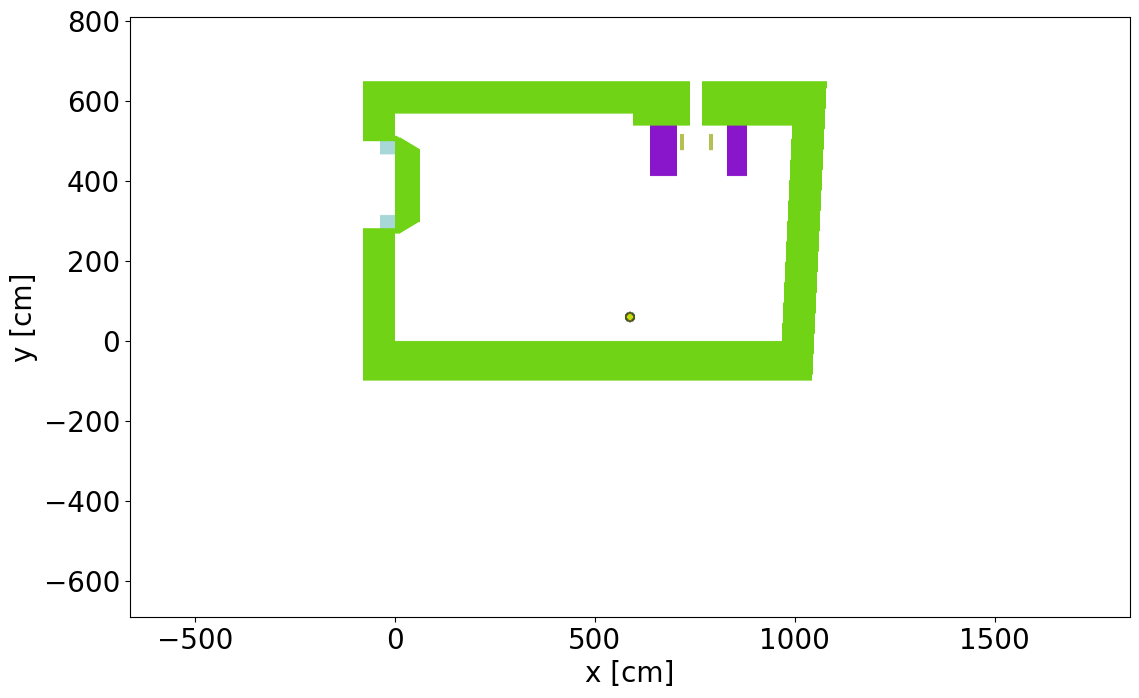

In [3]:
# Visualization

from vault import Air
from openmc_model import air

x_c = 587
y_c = 60
z_c = 100
ax = geometry.plot(
    width=(2500, 1500),
    origin=(x_c, y_c, z_c + 10),
    pixels=(1000, 1000),
    basis="xy",
    color_by="material",
    colors={Air: "white", air: "white"},
)
ax.tick_params(axis="both", labelsize=20)
ax.set_xlabel(ax.get_xlabel(), fontsize=20)
ax.set_ylabel(ax.get_ylabel(), fontsize=20)
plt.show()

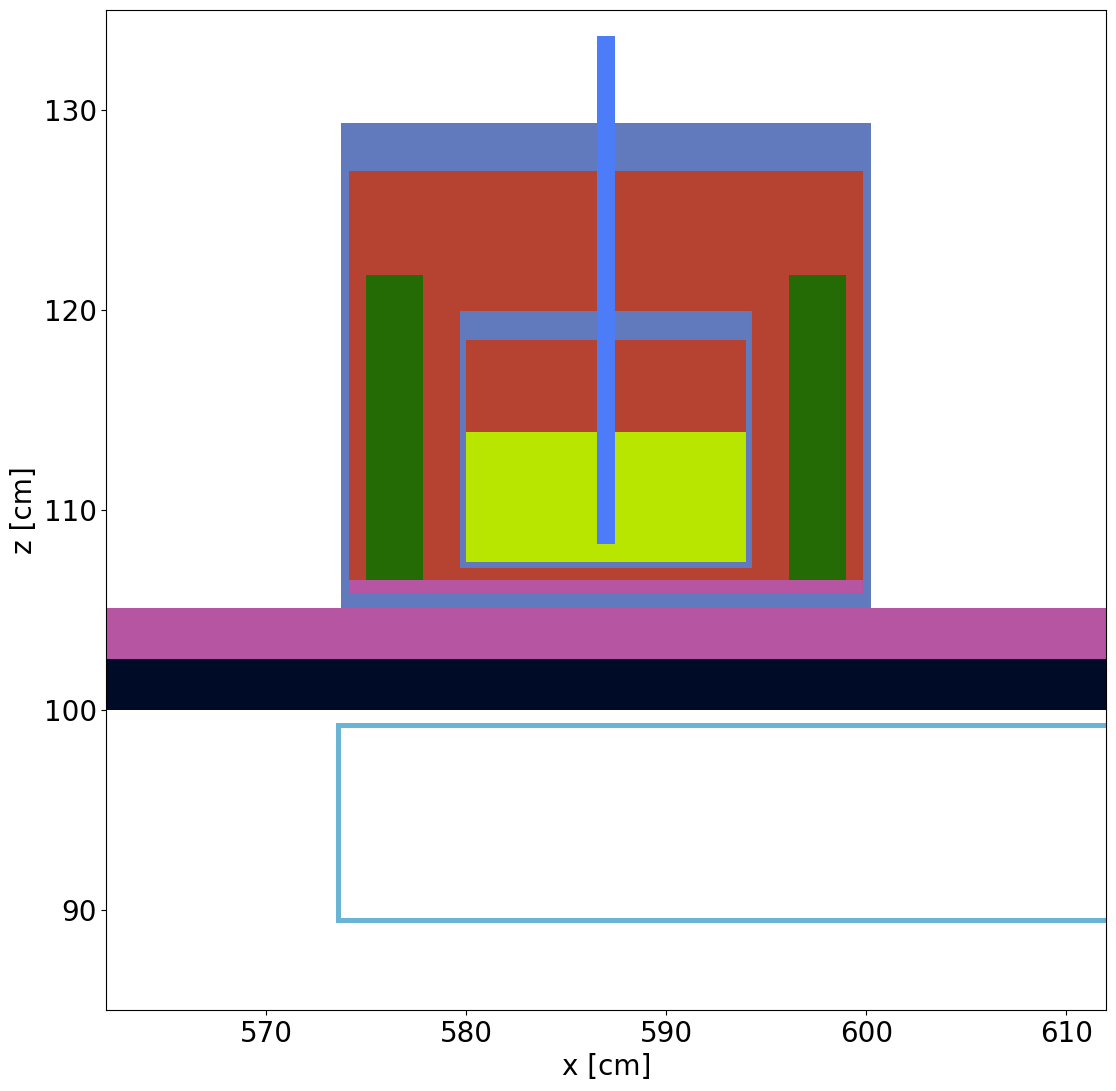

In [4]:
ax = geometry.plot(
    width=(50, 50),
    origin=(x_c, y_c, z_c + 10),
    pixels=(1000, 1000),
    basis="xz",
    color_by="material",
    colors={Air: "white", air: "white"},
)
ax.tick_params(axis="both", labelsize=20)
ax.set_xlabel(ax.get_xlabel(), fontsize=20)
ax.set_ylabel(ax.get_ylabel(), fontsize=20)
plt.show()

### Result

In [5]:
sp = openmc.StatePoint(f"statepoint.{model.settings.batches}.h5")
tbr_withvault = sp.get_tally(name="TBR").get_pandas_dataframe()
print(f"TBR: {tbr_withvault['mean'].iloc[0] :.6e}\n")
print(f"TBR std. dev.: {tbr_withvault['std. dev.'].iloc[0] :.6e}\n")

TBR: 2.041907e-03

TBR std. dev.: 2.790358e-05

